In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
df1 = pd.read_csv("data/test.csv")
df2 = pd.read_csv("data/train.csv")
df = pd.concat([df1,df2], ignore_index=True)

#move sale_price (Y) to the last column for readability
sale_price_column = df.pop('sale_price')
df['sale_price'] = sale_price_column

df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,...,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail,sale_price
0,1,maruti swift dzire,2012,petrol,69029,pune,2068,sedan,manual,vxi 1.2 bs iv,...,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False,364299
1,2,hyundai eon,2013,petrol,45721,gurgaon,903,hatchback,manual,era plus,...,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False,216799
2,3,honda amaze,2013,diesel,37395,pune,2809,sedan,manual,1.5 smt i dtec,...,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False,387399
3,4,hyundai i20,2012,petrol,37652,bengaluru,1054,hatchback,manual,magna o 1.2,...,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False,364699
4,5,hyundai creta,2017,diesel,53648,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,...,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False,1082011


# Exploring Numerical Data

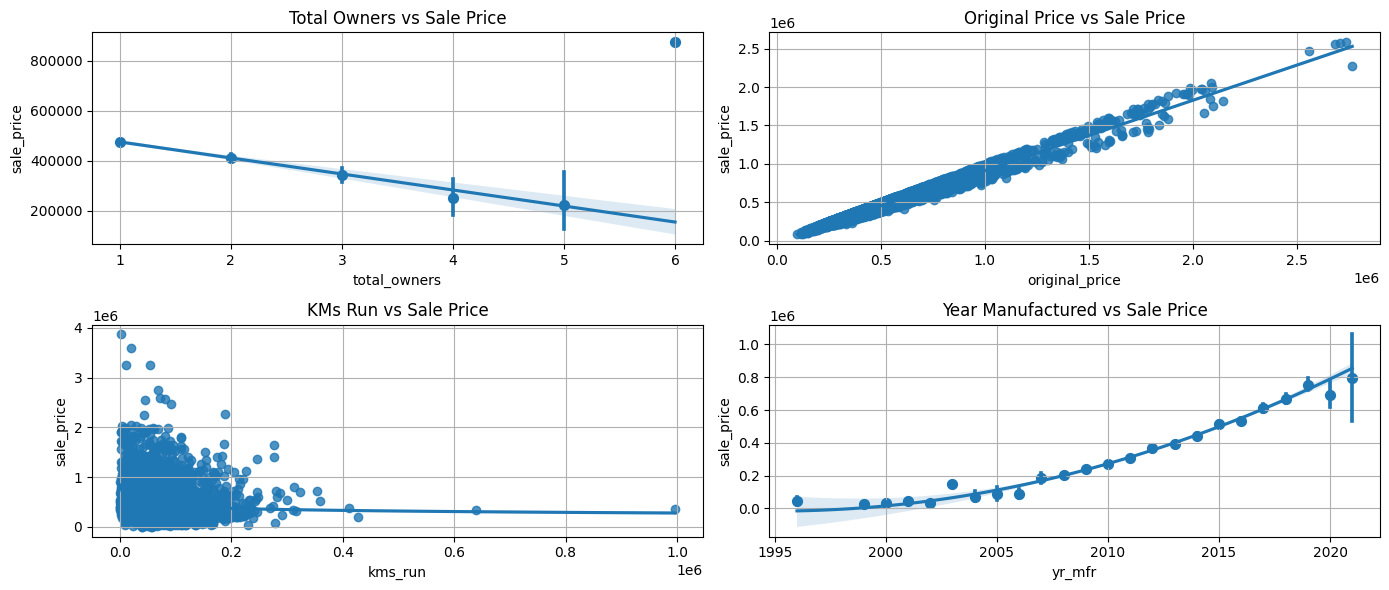

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

sns.regplot(data=df, x="total_owners", y="sale_price", x_estimator=np.mean, ax=axes[0,0])
axes[0,0].set_title('Total Owners vs Sale Price')
axes[0,0].grid(True)


sns.regplot(data=df, x="original_price", y="sale_price", ax=axes[0,1])
axes[0,1].set_title('Original Price vs Sale Price')
axes[0,1].grid(True)

sns.regplot(data=df, x="kms_run", y="sale_price", ax=axes[1,0], logx=True)
axes[1,0].set_title('KMs Run vs Sale Price')
axes[1,0].grid(True)


sns.regplot(data=df, x="yr_mfr", y="sale_price",  x_estimator=np.mean, ax=axes[1,1], order=2)
axes[1,1].set_title('Year Manufactured vs Sale Price') 
axes[1,1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


# Categorical Data

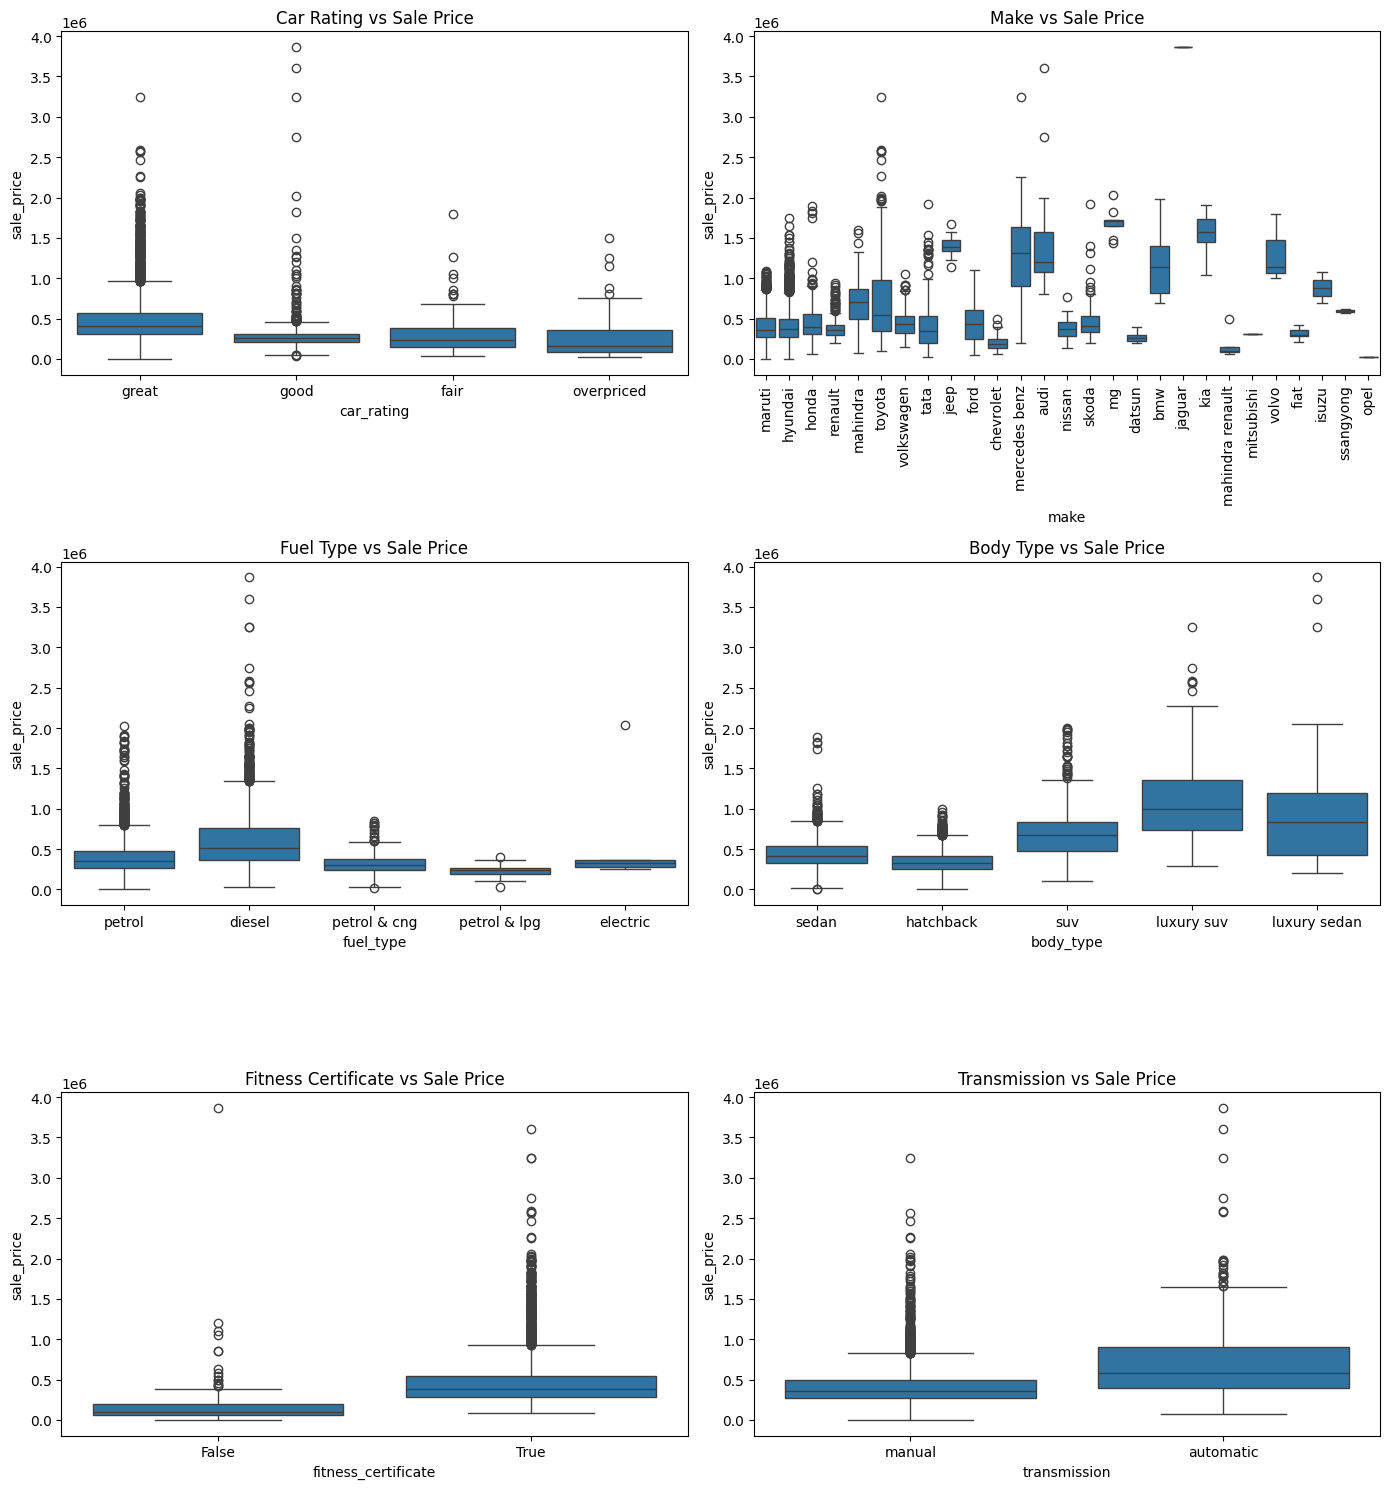

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(14, 15)) 

sns.boxplot(data=df, x="car_rating", y="sale_price", ax=axes[0, 0])
axes[0, 0].set_title('Car Rating vs Sale Price')

sns.boxplot(data=df, x="make", y="sale_price", ax=axes[0, 1])
axes[0, 1].set_title('Make vs Sale Price')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels in the second subplot

sns.boxplot(data=df, x="fuel_type", y="sale_price", ax=axes[1, 0]) 
axes[1, 0].set_title('Fuel Type vs Sale Price')

sns.boxplot(data=df, x="body_type", y="sale_price", ax=axes[1, 1])
axes[1, 1].set_title('Body Type vs Sale Price')

sns.boxplot(data=df, x="fitness_certificate", y="sale_price", ax=axes[2, 0])
axes[2, 0].set_title('Fitness Certificate vs Sale Price')

sns.boxplot(data=df, x="transmission", y="sale_price", ax=axes[2,1])  
axes[2, 1].set_title('Transmission vs Sale Price')


# Display the plots
plt.tight_layout()
plt.show()

In [8]:
sns.heatmap(df.corr(),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True)

ValueError: could not convert string to float: 'maruti swift dzire'

# Pair Plot for Multivariate Analysis


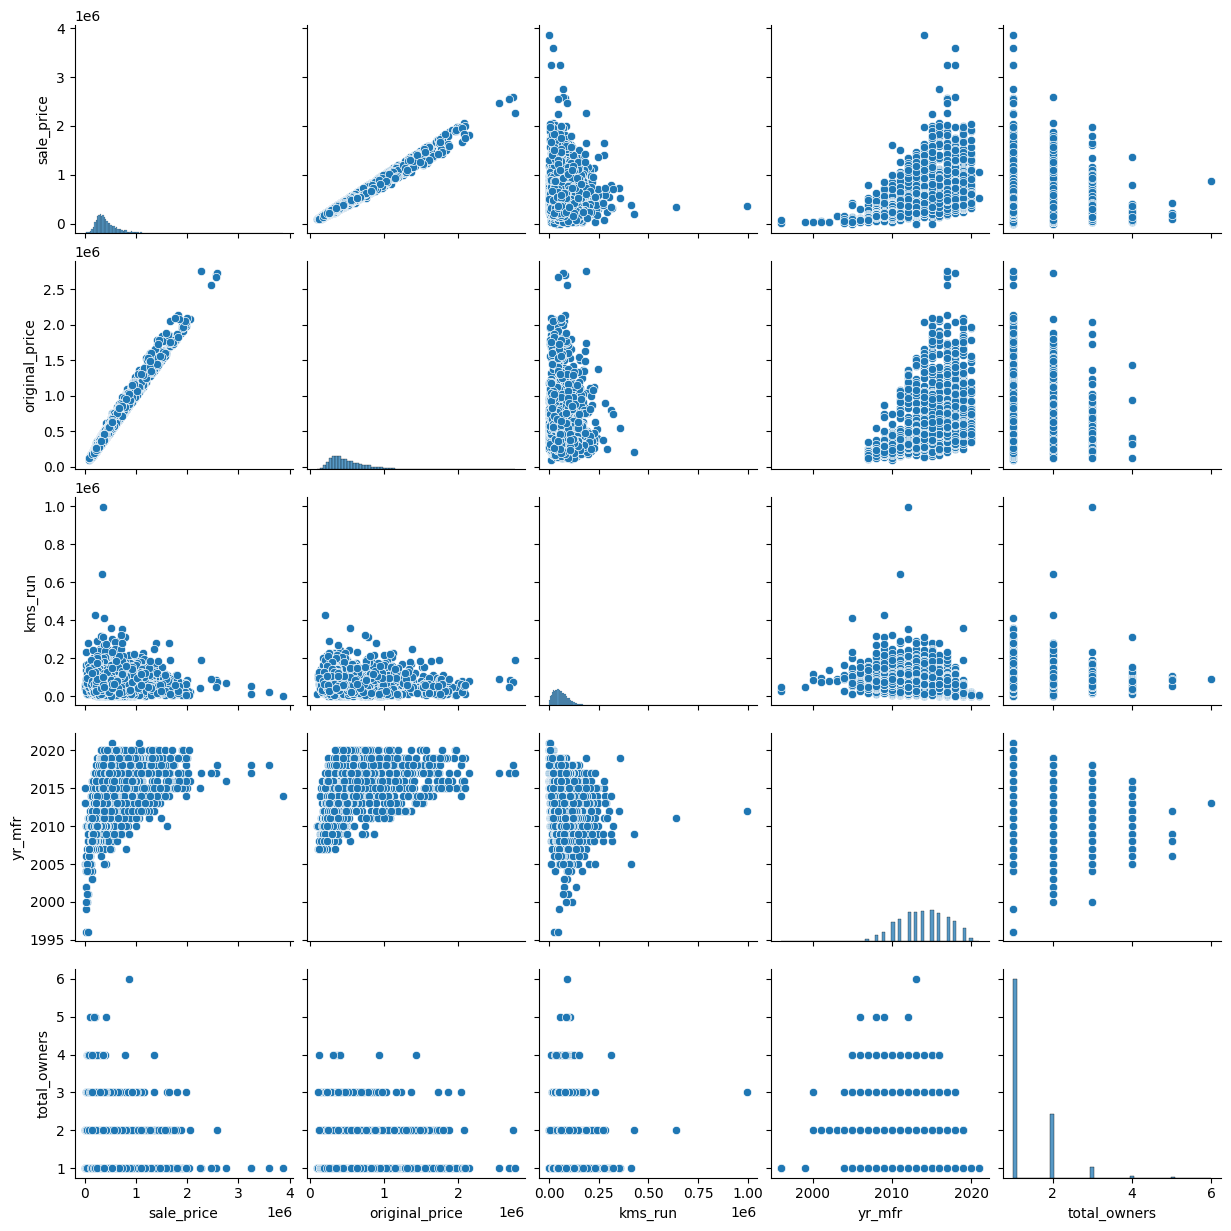

In [9]:
import seaborn as sns

# Select a subset of variables for clarity and better visualization
selected_columns = ['sale_price', 'original_price', 'kms_run', 'yr_mfr', 'total_owners']
sns.pairplot(df[selected_columns])
plt.show()


# Feature Importance Using Random Forest


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your DataFrame and already loaded

# If you decide to use sampling for performance reasons, keep the random_state fixed
# df_sample = df.sample(frac=0.5, random_state=42) # Uncomment if sampling is necessary

# Preparing the data without sampling or with a fixed sample
X = df.drop(['sale_price', 'car_name', 'city', 'ad_created_on'], axis=1)  # Adjusted to use df or df_sample consistently
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
y = df['sale_price']  # Adjusted to use df or df_sample consistently

# Splitting the data with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model with a fixed random state and using all CPU cores
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Getting feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances.head(10))


                             importance
booking_down_pymnt             0.563543
emi_starts_from                0.434122
broker_quote                   0.000900
car_rating_great               0.000355
original_price                 0.000171
registered_city_mumbai east    0.000142
kms_run                        0.000123
body_type_luxury sedan         0.000101
rto_mh03                       0.000091
body_type_luxury suv           0.000072


# Outlier Detection


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import pandas as pd

# Assuming df is your original dataframe

# Select only numeric columns for outlier detection
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values by imputation
imputer = SimpleImputer(strategy='mean')  # or median, most_frequent depending on your data
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply Isolation Forest for outlier detection
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
outliers = isolation_forest.fit_predict(df_numeric_imputed)

# Add outlier detection results back to the original dataframe
df['outlier'] = outliers  # -1 indicates an outlier, 1 indicates an inlier

# Filter and display only outliers
outliers_df = df[df['outlier'] == -1]
print(outliers_df)


        id              car_name  yr_mfr fuel_type  kms_run       city  \
4        5         hyundai creta    2017    diesel    53648    lucknow   
10      11         hyundai venue    2019    petrol     5450     mumbai   
11      12       mahindra xuv500    2015    diesel    85560  faridabad   
15      16  toyota corolla altis    2009    petrol   246967     mumbai   
16      17   hyundai santro xing    2008    petrol    71758     mumbai   
...    ...                   ...     ...       ...      ...        ...   
7378  6379          maruti dzire    2019    petrol    15547    lucknow   
7387  6388         hyundai verna    2015    diesel   148250    lucknow   
7394  6395       toyota fortuner    2012    diesel   116838    lucknow   
7396  6397         toyota innova    2009    diesel   274167    lucknow   
7397  6398       tata indica ev2    2011    diesel   119634    lucknow   

      times_viewed     body_type transmission                variant  ...  \
4             2927           suv  